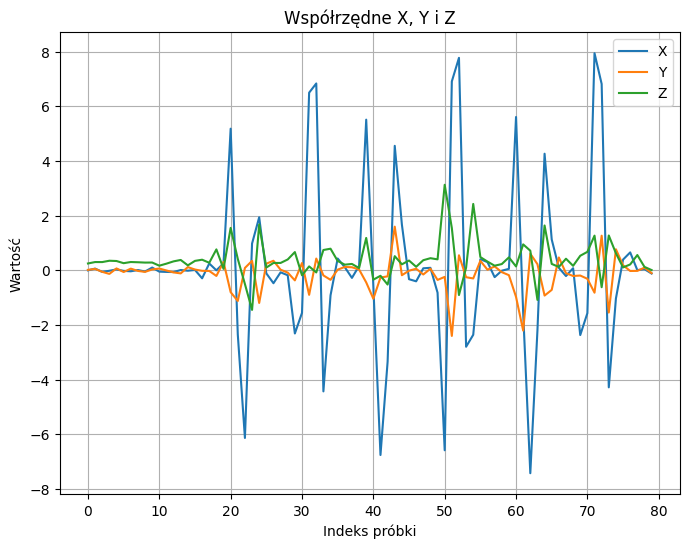

In [30]:
import matplotlib.pyplot as plt

# Odczytanie danych z pliku
with open('data_out.txt', 'r') as file:
    data = file.readlines()

# Przetworzenie danych
x_values = []
y_values = []
z_values = []
result = []

for line in data:


    values = line.strip().split(',')
    if len(values) == 1:
        result.append(values[0])
    else:
        x_values.append(float(values[0]))
        y_values.append(float(values[1]))
        z_values.append(float(values[2]))

# Narysowanie wykresu
plt.figure(figsize=(8, 6))
plt.plot(x_values, label='X')
plt.plot(y_values, label='Y')
plt.plot(z_values, label='Z')
plt.xlabel('Indeks próbki')
plt.ylabel('Wartość')
plt.title('Współrzędne X, Y i Z')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
print(result)

['left']


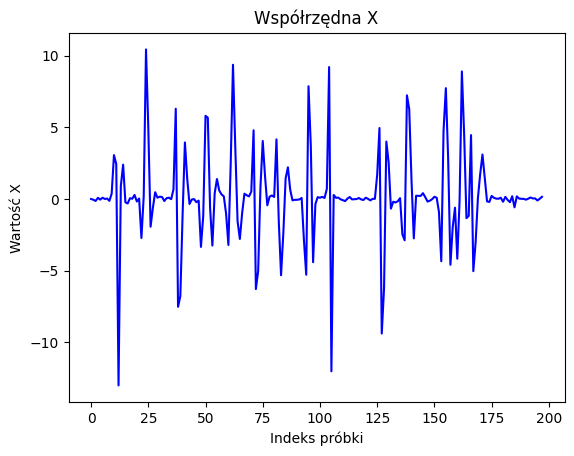

In [73]:
import matplotlib.pyplot as plt

# Odczytanie danych z pliku
with open('data_out.txt', 'r') as file:
    data = file.readlines()

# Przetworzenie danych
x_values = []
y_values = []
z_values = []

for line in data:
    values = line.strip().split(',')
    if len(values) == 1:
        pass
    else:
        x_values.append(float(values[0]))
        y_values.append(float(values[1]))
        z_values.append(float(values[2]))

# Narysowanie trzech wykresów
# plt.figure(figsize=(12, 4))

# plt.subplot(1, 3, 1)
plt.plot(x_values, color='blue')
plt.xlabel('Indeks próbki')
plt.ylabel('Wartość X')
plt.title('Współrzędna X')

# plt.subplot(1, 3, 2)
# plt.plot(y_values, color='red')
# plt.xlabel('Indeks próbki')
# plt.ylabel('Wartość Y')
# plt.title('Współrzędna Y')

# plt.subplot(1, 3, 3)
# plt.plot(z_values, color='green')
# plt.xlabel('Indeks próbki')
# plt.ylabel('Wartość Z')
# plt.title('Współrzędna Z')

# plt.tight_layout()
plt.show()


In [72]:
x_values = []
with open('data_out.txt', 'r') as file:
    data = file.readlines()
    
    for line in data:
        values = line.strip().split(',')
        x_values.append(float(values[0]))

last_x = 0
sec_last_x = 0
spikes = []
results = []
def read_right_left(x, last_x, sec_last_x, spikes):
    
    if max([sec_last_x, last_x, x]) == last_x or min([sec_last_x, last_x, x]) == last_x:
        spikes.append(last_x)
        print(spikes)
        if len(spikes) == 3:
            if abs(spikes[1]) > 4.5:
                # print(spikes)
                if last_x > 0:
                    # prawo
                    return 'right'
                else:
                    return 'left'
            else:
                # print(spikes)
                # if x > 0:
                #     # prawo
                #     return 'right', 0, []
                # else:
                #     return 'left', 0, []
                return []
    return spikes

for x_val in x_values:
    if abs(last_x) > 1.5:
        spikes = read_right_left(x_val, last_x, sec_last_x, spikes)
        if type(spikes) == str:
            print(spikes)
            spikes = []
    sec_last_x = last_x
    last_x = x_val

[5.1795063]
[5.1795063, -6.137466]
[5.1795063, -6.137466, 1.9386954]
right
[-2.3145592]
[-2.3145592, 6.834227]
[-2.3145592, 6.834227, -4.4331822]
left
[5.5096736]
[5.5096736, -6.7613444]
[5.5096736, -6.7613444, 4.5522757]
right
[-6.587574]
[-6.587574, 7.771206]
[-6.587574, 7.771206, -2.8002238]
left
[5.6072044]
[5.6072044, -7.4274287]
[5.6072044, -7.4274287, 4.26332]
right
[-2.3726344]
[-2.3726344, 7.9405823]
[-2.3726344, 7.9405823, -4.2851176]
left


In [62]:
x_values = []
with open('data_out.txt', 'r') as file:
    data = file.readlines()
    
    for line in data:
        values = line.strip().split(',')
        x_values.append(float(values[0]))

diff = 0
last_x = 0
spikes = []
results = []
def read_right_left(x, last_x, last_diff, spikes):
    diff = x - last_x
    if diff * last_diff <= 0:
        spikes.append(x)
        print(spikes)
        if len(spikes) == 3:
            if abs(spikes[1]) > 4.5:
                print(spikes)
                if last_x > 0:
                    # prawo
                    return 'right', diff, []
                else:
                    return 'left', diff, []
            else:
                print(spikes)
                # if x > 0:
                #     # prawo
                #     return 'right', 0, []
                # else:
                #     return 'left', 0, []
                return last_x, diff, []
    return x, diff, spikes

for x_val in x_values:
    if abs(x_val) > 1.5:
        last_x, diff, spikes = read_right_left(x_val, last_x, diff, spikes)
        if type(last_x) == str:
            print(last_x)
            last_x = x_val

[5.1795063]
[5.1795063, -2.3500042]
[5.1795063, -2.3500042, 1.9386954]
[5.1795063, -2.3500042, 1.9386954]
[-4.4331822]
[-4.4331822, 5.5096736]
[-4.4331822, 5.5096736, -6.7613444]
[-4.4331822, 5.5096736, -6.7613444]
right
[-3.3450377]
[-3.3450377, 1.6721479]
[-3.3450377, 1.6721479, 6.909465]
[-3.3450377, 1.6721479, 6.909465]
[-2.8002238]
[-2.8002238, -2.3622053]
[-2.8002238, -2.3622053, -1.557011]
[-2.8002238, -2.3622053, -1.557011]
[-2.2025952]
[-2.2025952, -2.3726344]
[-2.2025952, -2.3726344, -1.5702306]
[-2.2025952, -2.3726344, -1.5702306]
[6.8167562]


In [51]:
x_values = []
with open('data_out.txt', 'r') as file:
    data = file.readlines()
    
    for line in data:
        values = line.strip().split(',')
        x_values.append(float(values[0]))
print(x_values)

[-0.00453794, 0.060171247, -0.060293853, -0.020255595, 0.03063516, -0.023972929, -0.038908362, 0.00703077, -0.047131367, 0.09830608, -0.05152401, -0.062255133, -0.06643983, 0.008171912, -0.0180529, 0.010012843, -0.29598507, 0.24683413, -0.003372401, 0.25254595, 5.1795063, -2.3500042, -6.137466, 0.9766282, 1.9386954, -0.11485112, -0.4749924, -0.07655558, -0.18392444, -2.3145592, -1.5605354, 6.496893, 6.834227, -4.4331822, -0.9156233, 0.42896745, 0.11026472, -0.2800283, 0.15880345, 5.5096736, -0.58649325, -6.7613444, -3.3450377, 4.5522757, 1.6721479, -0.32811534, -0.4053726, 0.07131308, 0.088101745, -0.8215469, -6.587574, 6.909465, 7.771206, -2.8002238, -2.3622053, 0.4037057, 0.29621243, -0.2529707, -0.017567098, 0.05077976, 5.6072044, -1.557011, -7.4274287, -2.2025952, 4.26332, 1.1266491, 0.08862132, -0.21245985, 0.07429135, -2.3726344, -1.5702306, 7.9405823, 6.8167562, -4.2851176, -1.0326295, 0.389886, 0.6526953, 0.004462339, 0.038817953, -0.12096324]
